<a href="https://colab.research.google.com/github/MorganChinTang/Flower-Recognition-Model/blob/main/Morgan_FLOWER_RECOGNITION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries and Setup

In [ ]:
# Correct CELL 1 : Data Import
# Computer Vision
import torch
import torchvision
from torchvision import transforms
import cv2

# Pre-trained Models
from transformers import pipeline

# Utilities
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
import time
from collections import Counter
import subprocess

print("✓ All libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

✓ All libraries imported successfully!
PyTorch version: 2.9.0+cu126
CUDA available: True


In [ ]:
# Correct CELL 2
# Check device and setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")
# Create project directories
dirs = ['videos', 'output', 'results']
for dir_name in dirs:
    os.makedirs(dir_name, exist_ok=True)
    print(f"✓ Created {dir_name}/")
# Load pre-trained flower classifier
print("\nLoading pre-trained model...")
model_name = "loretyan/vit-base-oxford-flowers-102"
classifier = pipeline(
    "image-classification",
    model=model_name,
    device=0 if device.type == 'cuda' else -1
)
print(f"✓ Model loaded: {model_name}")
print(f"✓ Accuracy: 99.51% on 102 flower species")

Device: cuda
✓ Created videos/
✓ Created output/
✓ Created results/

Loading pre-trained model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/344M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


✓ Model loaded: loretyan/vit-base-oxford-flowers-102
✓ Accuracy: 99.51% on 102 flower species


In [ ]:
# Correct CELL 3
# Install yt-dlp for YouTube download
!pip install yt-dlp -q

# Function to download YouTube video
def download_youtube_video(url, output_dir='videos'):
    """Download YouTube video"""
    os.makedirs(output_dir, exist_ok=True)

    output_template = os.path.join(output_dir, '%(title)s.%(ext)s')

    command = [
        'yt-dlp',
        '-f', 'best[ext=mp4]',
        '-o', output_template,
        url
    ]

    print(f"Downloading video from: {url}")
    result = subprocess.run(command, capture_output=True, text=True)

    if result.returncode == 0:
        video_files = [f for f in os.listdir(output_dir) if f.endswith('.mp4')]
        if video_files:
            video_path = os.path.join(output_dir, video_files[-1])
            print(f"✓ Video saved: {video_path}")
            return video_path
    else:
        print(f"Error: {result.stderr}")
        return None

print("✓ YouTube downloader ready!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.6 MB/s eta 0:00:00
✓ YouTube downloader ready!


In [ ]:
# Correct CELL 4
# Function to classify flowers in video
def classify_video_flowers(video_path, frame_interval=30):
    """
    Process video and classify flowers in each frame
    Args:
        video_path: Path to video file
        frame_interval: Process every nth frame (30 = every 30th frame)
    """
    results = []
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    processed_count = 0

    print(f"Processing video: {video_path}")
    print(f"Frame interval: {frame_interval}")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            # Convert BGR to RGB for PIL
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            from PIL import Image as PILImage
            pil_image = PILImage.fromarray(frame_rgb)

            # Classify
            predictions = classifier(pil_image)

            result = {
                'frame': frame_count,
                'flower': predictions[0]['label'],
                'confidence': predictions[0]['score'],
                'timestamp': frame_count / cap.get(cv2.CAP_PROP_FPS)
            }
            results.append(result)

            print(f"Frame {frame_count}: {result['flower']} ({result['confidence']:.2%})")
            processed_count += 1

        frame_count += 1

    cap.release()
    print(f"\n✓ Processed {processed_count} frames from {frame_count} total")
    return results

print("✓ Flower classification function ready!")

✓ Flower classification function ready!


In [ ]:
# Correct CELL 5
# Test the classifier with a YouTube video
print("=" * 60)
print("FLOWER RECOGNITION - YOUTUBE VIDEO PROCESSING")
print("=" * 60)

# Download a sample flower video
# Using a short public domain flower video
# Backup Video links
# https://www.youtube.com/watch?v=pJqA02a_g-Y
# https://www.youtube.com/watch?v=ryUxrFUk6MY
# https://www.youtube.com/watch?v=bfhCkXA6c9s
# https://www.youtube.com/watch?v=LjCzPp-MK48
# https://www.youtube.com/watch?v=1Yf8Zo06Y-E
sample_url = "https://www.youtube.com/watch?v=pJqA02a_g-Y"  # Replace with actual flower video

print("\nStep 1: Download YouTube video")
video_path = download_youtube_video(sample_url)

if video_path:
    print("\nStep 2: Process video and classify flowers")
    results = classify_video_flowers(video_path, frame_interval=30)

    print("\n" + "=" * 60)
    print("RESULTS SUMMARY")
    print("=" * 60)

    if results:
        # Count flower types
        flower_counts = Counter([r['flower'] for r in results])
        avg_confidence = np.mean([r['confidence'] for r in results])

        print(f"\nTotal frames processed: {len(results)}")
        print(f"Unique flowers detected: {len(flower_counts)}")
        print(f"Average confidence: {avg_confidence:.2%}")
        print(f"\nFlowers detected:")
        for flower, count in flower_counts.most_common():
            print(f"  - {flower}: {count} times")
else:
    print("Failed to download video")

FLOWER RECOGNITION - YOUTUBE VIDEO PROCESSING

Step 1: Download YouTube video
✓ Video saved: videos/BLOOMING FLOWERS - TIME LAPSE - Watch Flowers Bloom Before Your Eyes.mp4

Step 2: Process video and classify flowers
Processing video: videos/BLOOMING FLOWERS - TIME LAPSE - Watch Flowers Bloom Before Your Eyes.mp4
Frame interval: 30
Frame 0: giant white arum lily (4.82%)
Frame 30: giant white arum lily (7.81%)
Frame 60: giant white arum lily (7.84%)
Frame 90: giant white arum lily (9.50%)
Frame 120: giant white arum lily (13.47%)
Frame 150: giant white arum lily (12.98%)
Frame 180: giant white arum lily (6.88%)
Frame 210: giant white arum lily (7.69%)
Frame 240: giant white arum lily (7.72%)
Frame 270: giant white arum lily (6.56%)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Frame 300: giant white arum lily (8.52%)
Frame 330: giant white arum lily (8.51%)
Frame 360: giant white arum lily (5.17%)
Frame 390: daffodil (91.44%)
Frame 420: daffodil (88.17%)
Frame 450: daffodil (81.60%)
Frame 480: daffodil (95.83%)
Frame 510: daffodil (95.67%)
Frame 540: daffodil (94.38%)
Frame 570: daffodil (73.24%)
Frame 600: daffodil (82.40%)
Frame 630: daffodil (94.01%)
Frame 660: daffodil (94.28%)
Frame 690: daffodil (79.34%)
Frame 720: daffodil (96.34%)
Frame 750: grape hyacinth (11.27%)
Frame 780: grape hyacinth (21.35%)
Frame 810: grape hyacinth (34.99%)
Frame 840: grape hyacinth (89.34%)
Frame 870: primula (69.09%)
Frame 900: primula (98.84%)
Frame 930: primula (98.73%)
Frame 960: primula (99.01%)
Frame 990: primula (99.13%)
Frame 1020: primula (99.46%)
Frame 1050: sword lily (30.39%)
Frame 1080: sword lily (22.20%)
Frame 1110: sword lily (12.00%)
Frame 1140: daffodil (38.60%)
Frame 1170: daffodil (21.41%)
Frame 1200: daffodil (41.30%)
Frame 1230: peruvian lily (16.47%)

In [ ]:
# Correct CELL 6
# Install datasets library to apply trainfer learning on the pre-trained model
!pip install datasets -q

from datasets import load_dataset
from PIL import Image
import io

print("Downloading Oxford Flowers training dataset...")
train_dataset = load_dataset("Multimodal-Fatima/OxfordFlowers_train")
print(f"✓ Training dataset loaded: {len(train_dataset['train'])} images")

print("\nDownloading Oxford Flowers test dataset...")
test_dataset = load_dataset("Multimodal-Fatima/OxfordFlowers_test")
print(f"✓ Test dataset loaded: {len(test_dataset['test'])} images")

# Explore dataset structure
print("\nDataset structure:")
print(f"Train columns: {train_dataset['train'].column_names}")
print(f"Sample: {train_dataset['train'][0]}")

# Create local directories for organized data
import shutil
os.makedirs('data/train', exist_ok=True)
os.makedirs('data/test', exist_ok=True)

print("\n✓ Datasets ready for training!")

✓ Training dataset loaded: 1020 images

✓ Test dataset loaded: 6149 images

Dataset structure:
Train columns: ['image', 'label', 'id', 'clip_tags_ViT_L_14', 'blip_caption', 'LLM_Description_gpt3_downstream_tasks_ViT_L_14', 'clip_tags_ViT_L_14_ensemble_specific', 'LLM_Description_gpt3_downstream_tasks_visual_genome_ViT_L_14', 'clip_tags_ViT_L_14_with_openai_classes', 'clip_tags_ViT_L_14_wo_openai_classes', 'Attributes_ViT_L_14_text_davinci_003', 'Attributes_ViT_L_14_text_davinci_003_full', 'Attributes_ViT_L_14_text_davinci_003_oxfordflowers', 'clip_tags_ViT_L_14_simple_specific', 'clip_tags_ViT_B_16_simple_specific', 'clip_tags_ViT_B_16_ensemble_specific', 'clip_tags_ViT_B_32_simple_specific', 'clip_tags_ViT_B_32_ensemble_specific', 'Attributes_ViT_B_16_descriptors_text_davinci_003_full', 'Attributes_LAION_ViT_H_14_2B_descriptors_text_davinci_003_full', 'clip_tags_LAION_ViT_H_14_2B_simple_specific', 'clip_tags_LAION_ViT_H_14_2B_ensemble_specific']
Sample: {'image': <PIL.JpegImagePlugin.

In [ ]:
# Correct CELL 7: Prepare Data for Transfer Learning
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import vit_b_16

class FlowerDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image'].convert('RGB')
        label = item['label']

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Create datasets
train_flower_dataset = FlowerDataset(train_dataset['train'], transform=train_transform)
test_flower_dataset = FlowerDataset(test_dataset['test'], transform=val_transform)

# Create dataloaders
train_loader = DataLoader(train_flower_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_flower_dataset, batch_size=32, shuffle=False)

print(f"✓ Train loader: {len(train_loader)} batches")
print(f"✓ Test loader: {len(test_loader)} batches")

✓ Train loader: 32 batches
✓ Test loader: 193 batches


In [ ]:
# Correct CELL 7: First Training - Fine-tune Head Only (5 Epochs)
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import vit_b_16

# Load pre-trained ViT model
print("Loading pre-trained Vision Transformer...")
model = vit_b_16(pretrained=True)

# Freeze all layers except final classification head
for param in model.parameters():
    param.requires_grad = False

# Replace final layer for our flower classes
model.heads.head = nn.Linear(768, 102)
model = model.to(device)

# Loss and optimizer (only train final layer)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.heads.head.parameters(), lr=0.001)

print("✓ Model ready for fine-tuning!")
print("Training only final classification head")

# Training loop
num_epochs = 5
best_accuracy = 0

print("\n" + "="*60)
print("TRANSFER LEARNING - STAGE 1 (5 EPOCHS)")
print("="*60)

for epoch in range(num_epochs):
    # Train
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_acc = 100 * train_correct / train_total
    train_loss = train_loss / len(train_loader)

    # Validate
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss = val_loss / len(test_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Save best model
    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), 'finetuned_flower_model.pth')
        print(f"  ✓ Best model saved!")

print("\n" + "="*60)
print(f"Stage 1 complete! Best accuracy: {best_accuracy:.2f}%")
print("="*60)

Loading pre-trained Vision Transformer...
✓ Model ready for fine-tuning!
Training only final classification head

TRANSFER LEARNING - STAGE 1 (5 EPOCHS)
Epoch [1/5]
  Train Loss: 4.1656, Train Acc: 16.27%
  Val Loss: 3.2225, Val Acc: 48.30%
  ✓ Best model saved!
Epoch [2/5]
  Train Loss: 2.4309, Train Acc: 68.04%
  Val Loss: 2.2904, Val Acc: 68.45%
  ✓ Best model saved!
Epoch [3/5]
  Train Loss: 1.4900, Train Acc: 87.65%
  Val Loss: 1.7551, Val Acc: 75.67%
  ✓ Best model saved!
Epoch [4/5]
  Train Loss: 0.9795, Train Acc: 93.63%
  Val Loss: 1.4592, Val Acc: 78.03%
  ✓ Best model saved!
Epoch [5/5]
  Train Loss: 0.6859, Train Acc: 96.76%
  Val Loss: 1.2665, Val Acc: 79.66%
  ✓ Best model saved!

Stage 1 complete! Best accuracy: 79.66%


In [ ]:
# Correct CELL 8: Second Training - Unfreeze Last 3 Blocks (10 Epochs)
import os

# Check if model file exists
model_file = 'finetuned_flower_model.pth'
if not os.path.exists(model_file):
    print(f"✗ Error: {model_file} not found!")
    print("Make sure Cell 7 completed successfully and saved the model")
    print(f"Current directory: {os.getcwd()}")
    print(f"Files in directory: {os.listdir('.')}")
else:
    # Load the model trained in CELL 7
    print("Loading model from CELL 7...")
    model = vit_b_16(pretrained=False)
    model.heads.head = nn.Linear(768, 102)
    model.load_state_dict(torch.load(model_file))
    model = model.to(device)

    # Unfreeze last 3 transformer blocks + final layer
    for name, param in model.named_parameters():
        if 'encoder.layers.encoder_layer_11' in name or 'encoder.layers.encoder_layer_10' in name or 'encoder.layers.encoder_layer_9' in name or 'heads' in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # Lower learning rate for careful fine-tuning
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

    print("✓ Model loaded and ready for extended fine-tuning!")
    print("Training last 3 transformer blocks + final layer")

    # Extended training
    num_epochs = 10
    best_accuracy = 0

    print("\n" + "="*60)
    print("TRANSFER LEARNING - STAGE 2 (10 EPOCHS)")
    print("="*60)

    for epoch in range(num_epochs):
        # Train
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        train_acc = 100 * train_correct / train_total
        train_loss = train_loss / len(train_loader)

        # Validate
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_acc = 100 * val_correct / val_total
        val_loss = val_loss / len(test_loader)

        print(f"Epoch [{epoch+1}/{num_epochs}] Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

        # Save best model
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            torch.save(model.state_dict(), 'finetuned_flower_model_extended.pth')
            print(f"  ✓ Best model saved! (Accuracy: {val_acc:.2f}%)")

    print("\n" + "="*60)
    print(f"Stage 2 complete! Best accuracy: {best_accuracy:.2f}%")
    print("="*60)

Loading model from CELL 7...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✓ Model loaded and ready for extended fine-tuning!
Training last 3 transformer blocks + final layer

TRANSFER LEARNING - STAGE 2 (10 EPOCHS)
Epoch [1/10] Train Acc: 96.96% | Val Acc: 84.68%
  ✓ Best model saved! (Accuracy: 84.68%)
Epoch [2/10] Train Acc: 99.90% | Val Acc: 87.72%
  ✓ Best model saved! (Accuracy: 87.72%)
Epoch [3/10] Train Acc: 100.00% | Val Acc: 88.34%
  ✓ Best model saved! (Accuracy: 88.34%)
Epoch [4/10] Train Acc: 100.00% | Val Acc: 88.57%
  ✓ Best model saved! (Accuracy: 88.57%)
Epoch [5/10] Train Acc: 100.00% | Val Acc: 88.79%
  ✓ Best model saved! (Accuracy: 88.79%)
Epoch [6/10] Train Acc: 100.00% | Val Acc: 88.91%
  ✓ Best model saved! (Accuracy: 88.91%)
Epoch [7/10] Train Acc: 100.00% | Val Acc: 89.06%
  ✓ Best model saved! (Accuracy: 89.06%)
Epoch [8/10] Train Acc: 100.00% | Val Acc: 89.17%
  ✓ Best model saved! (Accuracy: 89.17%)
Epoch [9/10] Train Acc: 100.00% | Val Acc: 89.27%
  ✓ Best model saved! (Accuracy: 89.27%)
Epoch [10/10] Train Acc: 100.00% | Val Acc

In [ ]:
# Correct CELL 9: Third Training - Unfreeze All Blocks (15 Epochs)
# Load the model trained in CELL 8
print("Loading model from CELL 8...")
model = vit_b_16(pretrained=False)
model.heads.head = nn.Linear(768, 102)
model.load_state_dict(torch.load('finetuned_flower_model_extended.pth'))
model = model.to(device)

# Unfreeze all transformer blocks + final layer
for name, param in model.named_parameters():
    if 'encoder.layers.encoder_layer' in name or 'heads' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Even lower learning rate for careful fine-tuning
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00005)

print("✓ Model loaded and ready for deeper fine-tuning!")
print("Training all transformer blocks + final layer")

# Train for 15 epochs
num_epochs = 15
best_accuracy = 0

print("\n" + "="*60)
print("TRANSFER LEARNING - STAGE 3 (15 EPOCHS)")
print("="*60)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_acc = 100 * train_correct / train_total
    train_loss = train_loss / len(train_loader)

    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss = val_loss / len(test_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

    if val_acc > best_accuracy:
        best_accuracy = val_acc
        torch.save(model.state_dict(), 'finetuned_flower_model_best.pth')
        print(f"  ✓ Best model saved! (Accuracy: {val_acc:.2f}%)")

print("\n" + "="*60)
print(f"Stage 3 complete! Best accuracy: {best_accuracy:.2f}%")
print("="*60)

Loading model from CELL 8...
✓ Model loaded and ready for deeper fine-tuning!
Training all transformer blocks + final layer

TRANSFER LEARNING - STAGE 3 (15 EPOCHS)
Epoch [1/15] Train Acc: 100.00% | Val Acc: 89.84%
  ✓ Best model saved! (Accuracy: 89.84%)
Epoch [2/15] Train Acc: 99.61% | Val Acc: 87.64%
Epoch [3/15] Train Acc: 100.00% | Val Acc: 90.44%
  ✓ Best model saved! (Accuracy: 90.44%)
Epoch [4/15] Train Acc: 100.00% | Val Acc: 91.10%
  ✓ Best model saved! (Accuracy: 91.10%)
Epoch [5/15] Train Acc: 100.00% | Val Acc: 91.51%
  ✓ Best model saved! (Accuracy: 91.51%)
Epoch [6/15] Train Acc: 100.00% | Val Acc: 91.62%
  ✓ Best model saved! (Accuracy: 91.62%)
Epoch [7/15] Train Acc: 100.00% | Val Acc: 91.64%
  ✓ Best model saved! (Accuracy: 91.64%)
Epoch [8/15] Train Acc: 100.00% | Val Acc: 91.71%
  ✓ Best model saved! (Accuracy: 91.71%)
Epoch [9/15] Train Acc: 100.00% | Val Acc: 91.66%
Epoch [10/15] Train Acc: 100.00% | Val Acc: 91.77%
  ✓ Best model saved! (Accuracy: 91.77%)
Epoch [

In [ ]:
# Cell 9a: Save Fine-tuned Model to Google Drive Folder
import shutil
from google.colab import drive

print("Mounting Google Drive...")
drive.mount('/content/drive')

# https://drive.google.com/drive/folders/1PYLA2Kdk6mHBMaZJ-ST1t4DmcK27_pvS?usp=sharing
# Get it from: https://drive.google.com/drive/folders/FOLDER_ID_HERE
GOOGLE_DRIVE_FOLDER_ID = "1PYLA2KdkomHBMaZJ-SI1t4DmcK27_pvS"

# Create models folder in Google Drive
models_dir = '/content/drive/My Drive/flower_models'
os.makedirs(models_dir, exist_ok=True)

# Copy trained model to Google Drive
model_file = 'finetuned_flower_model_best.pth'
if os.path.exists(model_file):
    shutil.copy(model_file, os.path.join(models_dir, model_file))
    print(f"✓ Model saved to Google Drive: {models_dir}/{model_file}")
    print(f"\nFolder ID for reference: {GOOGLE_DRIVE_FOLDER_ID}")
else:
    print(f"✗ Model file not found: {model_file}")

print("\n✓ Model persistence enabled!")
print(f"Models saved at: {models_dir}")

Mounting Google Drive...
Mounted at /content/drive
✓ Model saved to Google Drive: /content/drive/My Drive/flower_models/finetuned_flower_model_best.pth

Folder ID for reference: 1PYLA2KdkomHBMaZJ-SI1t4DmcK27_pvS

✓ Model persistence enabled!
Models saved at: /content/drive/My Drive/flower_models


In [ ]:
# Cell 9b: Load Model from Google Drive Folder (For New Runtime - Run this first!)
from google.colab import drive
from torchvision.models import vit_b_16
import torch.nn as nn

print("Mounting Google Drive...")
drive.mount('/content/drive')

model_path = '/content/drive/My Drive/flower_models/finetuned_flower_model_best.pth'

# Check if model exists on Google Drive
if os.path.exists(model_path):
    print(f"Loading model from Google Drive...")
    finetuned_model = vit_b_16(pretrained=False)
    finetuned_model.heads.head = nn.Linear(768, 102)
    finetuned_model.load_state_dict(torch.load(model_path))
    finetuned_model = finetuned_model.to(device)
    finetuned_model.eval()
    print("✓ Model loaded from Google Drive!")
    print("✓ Ready for video inference (skip training cells)")
else:
    print(f"✗ Model not found at: {model_path}")
    print("Run all training cells first, then Cell 9a to save model to Google Drive")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading model from Google Drive...
✓ Model loaded from Google Drive!
✓ Ready for video inference (skip training cells)


In [ ]:
# Correct CELL 10 : Load best model and test on a short video
# Load the best fine-tuned model
from google.colab import drive
from torchvision.models import vit_b_16
import torch.nn as nn

print("Mounting Google Drive...")
drive.mount('/content/drive')

model_path = '/content/drive/My Drive/flower_models/finetuned_flower_model_best.pth'

# Check if model exists on Google Drive
if os.path.exists(model_path):
    print(f"Loading model from Google Drive...")
    finetuned_model = vit_b_16(pretrained=False)
    finetuned_model.heads.head = nn.Linear(768, 102)
    finetuned_model.load_state_dict(torch.load(model_path))
    finetuned_model = finetuned_model.to(device)
    finetuned_model.eval()
    print("✓ Model loaded from Google Drive!")
    print("✓ Ready for video inference")
else:
    print(f"✗ Model not found at: {model_path}")
    print("Run training cells first, then Cell 8a to save model to Google Drive")

# Flower class mapping (Oxford Flowers 102)
flower_classes = [
    'pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'wild geranium',
    'tiger lily', 'moon orchid', 'bird of paradise', 'monarda', 'globe thistle',
    'snapdragon', "king's spear", 'yellow iris', 'globe-flower', 'purple coneflower',
    'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire pink', 'common dandelion',
    'petunia', 'wild pansy', 'primula', 'sunflower', 'lilium',
    'windflower', 'passion flower', 'poinsettia', 'vaseygrass', 'mexican sunflower',
    'armenian broom', 'camellia', 'dahlia', 'colt\'s foot', 'daffodil',
    'sword lily', 'celosia', 'desert-rose', 'tree poppy', 'morning glory',
    'orange dahlia', 'pink-yellow dahlia', 'carnation', 'columbine', 'al\'s lummis',
    'indian blanket', 'yellow tulip', 'osteospermum', 'gaura', 'gazania',
    'coral bells', 'toad lily', 'anthurium', 'frangipani', 'river lily',
    'cricket flower', 'japanese anemone', 'camellia', 'mexican aster', 'silverbush',
    'buttercup', 'oxeye daisy', 'common grape hyacinth', 'canna lily', 'anemone',
    'ranunculus', 'garden phlox', 'love in the mist', 'clematis', 'hibiscus',
    'bougainvillea', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'cowslip',
    'spring crocus', 'bearded iris', 'winter rose', 'christmas cactus', 'orange blossom',
    'iris', 'yellow rose', 'lady\'s slipper', 'yellow monarda', 'trumpet vine',
    'blanket flower', 'mexican petunia', 'black-eyed susan', 'silene', 'lenten rose',
    'polemoniaceae', 'rose', 'thorn apple', 'morning glory', 'wild geranium'
]

# Function to classify flowers in video with fine-tuned model
def classify_video_flowers_finetuned(video_path, frame_interval=30):
    """Classify flowers using fine-tuned model (92.45% accuracy)"""
    results = []
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    processed_count = 0

    print(f"\nProcessing video with fine-tuned model: {video_path}")
    print(f"Frame interval: {frame_interval}")
    print("="*60)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            from PIL import Image as PILImage
            pil_image = PILImage.fromarray(frame_rgb)

            # Preprocess
            image_tensor = val_transform(pil_image).unsqueeze(0).to(device)

            # Predict with fine-tuned model
            with torch.no_grad():
                outputs = finetuned_model(image_tensor)
                probabilities = torch.softmax(outputs, dim=1)
                confidence, predicted = torch.max(probabilities, 1)

            flower_idx = predicted.item()
            confidence_score = confidence.item()
            flower_name = flower_classes[flower_idx] if flower_idx < len(flower_classes) else f"Class {flower_idx}"

            result = {
                'frame': frame_count,
                'flower_name': flower_name,
                'flower_class': flower_idx,
                'confidence': confidence_score,
                'timestamp': frame_count / cap.get(cv2.CAP_PROP_FPS)
            }
            results.append(result)

            print(f"Frame {frame_count:4d} | Time: {result['timestamp']:6.2f}s | {flower_name:30s} | Confidence: {confidence_score:.2%}")
            processed_count += 1

        frame_count += 1

    cap.release()
    print("="*60)
    print(f"✓ Processed {processed_count} frames from {frame_count} total frames")
    return results

# Test on the same video
print("\n" + "="*60)
print("TESTING FINE-TUNED MODEL ON YOUTUBE VIDEO")
print("="*60)

# Use the video from earlier (replace with your YouTube URL)
# video_path = "videos/your_video.mp4"  # Path to downloaded video
# results = classify_video_flowers_finetuned(video_path, frame_interval=30)

# If you want to download a new video:
sample_url = "https://www.youtube.com/watch?v=bfhCkXA6c9s"  # Replace with flower video URL
video_path = download_youtube_video(sample_url)

if video_path:
    results = classify_video_flowers_finetuned(video_path, frame_interval=30)

    # Summary statistics
    if results:
        print("\n" + "="*60)
        print("RESULTS SUMMARY")
        print("="*60)

        flower_counts = Counter([r['flower_name'] for r in results])
        avg_confidence = np.mean([r['confidence'] for r in results])
        max_confidence = max([r['confidence'] for r in results])
        min_confidence = min([r['confidence'] for r in results])

        print(f"\nTotal frames processed: {len(results)}")
        print(f"Unique flowers detected: {len(flower_counts)}")
        print(f"Average confidence: {avg_confidence:.2%}")
        print(f"Max confidence: {max_confidence:.2%}")
        print(f"Min confidence: {min_confidence:.2%}")

        print(f"\nFlowers detected (sorted by frequency):")
        for flower, count in flower_counts.most_common():
            confidence_for_flower = np.mean([r['confidence'] for r in results if r['flower_name'] == flower])
            print(f"  {count:2d}x {flower:30s} (avg confidence: {confidence_for_flower:.2%})")

        print("\n" + "="*60)
else:
    print("Failed to download video")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading model from Google Drive...
✓ Model loaded from Google Drive!
✓ Ready for video inference

TESTING FINE-TUNED MODEL ON YOUTUBE VIDEO
✓ Video saved: videos/BLOOMING FLOWERS - TIME LAPSE - Watch Flowers Bloom Before Your Eyes.mp4

Processing video with fine-tuned model: videos/BLOOMING FLOWERS - TIME LAPSE - Watch Flowers Bloom Before Your Eyes.mp4
Frame interval: 30
Frame    0 | Time:   0.00s | bearded iris                   | Confidence: 4.03%
Frame   30 | Time:   1.20s | al's lummis                    | Confidence: 5.05%
Frame   60 | Time:   2.40s | al's lummis                    | Confidence: 4.88%
Frame   90 | Time:   3.60s | bearded iris                   | Confidence: 4.01%
Frame  120 | Time:   4.80s | al's lummis                    | Confidence: 5.43%
Frame  150 | Time:   6.00s | bearded iris                   | Confidenc

In [ ]:
# Cell 11 (MODIFIED): Video Link Manager - Google Drive Videos
class VideoManager:
    def __init__(self):
        self.videos = {
            "video_1": {
                "name": "Local Video 1", # https://drive.google.com/file/d/1-S0D9izcJKS31aoNxCRjfWMN1hRcOZnM/view?usp=drive_link
                "drive_id": "1-S0D9izcJKS31aoNxCRjfWMN1hRcOZnM",
                "description": "Video from Google Drive"
            },
            "video_2": {
                "name": "Local Video 2",#https://drive.google.com/file/d/1TE8_do_0rkqhT5j0Hv_P0qVZidXnsmgt/view?usp=sharing
                "drive_id": "1TE8_do_0rkqhT5j0Hv_P0qVZidXnsmgt",
                "description": "Another video from Google Drive"
            },
              "video_3": {
                "name": "Local Video 3",#https://drive.google.com/file/d/14IUpSo6K2pjukmHcZTkUdafaUX2gdWPJ/view?usp=sharing
                "drive_id": "14IUpSo6K2pjukmHcZTkUdafaUX2gdWPJ",
                "description": "Another video from Google Drive"
            }
        }
        self.current_video_path = None

    def add_video(self, video_id, name, drive_id, description=""):
        """Add a new video from Google Drive using file ID"""
        self.videos[video_id] = {
            "name": name,
            "drive_id": drive_id,
            "description": description
        }
        print(f"✓ Added: {name}")

    def list_videos(self):
        """Display all available videos"""
        print("\n" + "="*70)
        print("AVAILABLE VIDEOS (Google Drive)")
        print("="*70)
        for i, (vid_id, info) in enumerate(self.videos.items(), 1):
            print(f"\n{i}. {info['name']} ({vid_id})")
            print(f"   Description: {info['description']}")
            print(f"   Drive ID: {info['drive_id']}")
        print("\n" + "="*70)

    def select_video(self, video_id):
        """Select a video by ID and download from Google Drive"""
        if video_id not in self.videos:
            print(f"✗ Video {video_id} not found!")
            self.list_videos()
            return None

        video_info = self.videos[video_id]
        drive_id = video_info['drive_id']

        print(f"\nSelected: {video_info['name']}")
        print(f"Downloading from Google Drive...")

        # Create output directory
        output_dir = 'videos'
        os.makedirs(output_dir, exist_ok=True)

        # Download from Google Drive using drive_id
        output_path = os.path.join(output_dir, f"{video_id}_video.mp4")

        # Google Drive download URL
        download_url = f"https://drive.google.com/uc?id={drive_id}&export=download"

        try:
            import gdown
            gdown.download(download_url, output_path, quiet=False)

            if os.path.exists(output_path):
                self.current_video_path = output_path
                print(f"✓ Video ready: {output_path}")
                return output_path
            else:
                print("✗ Download failed")
                return None
        except Exception as e:
            print(f"✗ Error downloading: {e}")
            return None

    def select_by_number(self, number):
        """Select video by number from list"""
        video_ids = list(self.videos.keys())
        if 1 <= number <= len(video_ids):
            selected_id = video_ids[number - 1]
            return self.select_video(selected_id)
        else:
            print(f"✗ Invalid number. Please choose 1-{len(video_ids)}")
            return None

    def get_current_video(self):
        """Get the currently selected video path"""
        return self.current_video_path

# Install gdown for Google Drive downloads
!pip install gdown -q

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Initialize Video Manager
video_manager = VideoManager()

print("✓ Video Manager initialized (Google Drive)!")
print("\nUsage:")
print("  video_manager.list_videos()                    # Show all videos")
print("  video_manager.select_video('video_1')          # Select by ID")
print("  video_manager.select_by_number(1)              # Select by number")
print("  video_manager.add_video('video_3', 'Name', 'DRIVE_ID', 'Description')  # Add new video")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Video Manager initialized (Google Drive)!

Usage:
  video_manager.list_videos()                    # Show all videos
  video_manager.select_video('video_1')          # Select by ID
  video_manager.select_by_number(1)              # Select by number
  video_manager.add_video('video_3', 'Name', 'DRIVE_ID', 'Description')  # Add new video


In [ ]:
# Correct CELL 12: Real-time Video Playback with Smooth Frame Updates
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import time

# Load best fine-tuned model
print("Loading best fine-tuned model (92.45% accuracy)...")
finetuned_model = vit_b_16(pretrained=False)
finetuned_model.heads.head = nn.Linear(768, 102)
finetuned_model.load_state_dict(torch.load('finetuned_flower_model_best.pth'))
finetuned_model = finetuned_model.to(device)
finetuned_model.eval()

print("✓ Fine-tuned model loaded!")

# Flower class names (102 classes)
flower_classes = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", "wild geranium",
    "tiger lily", "moon orchid", "bird of paradise", "monarda", "globe thistle",
    "snapdragon", "king's spear", "yellow iris", "globe-flower", "purple coneflower",
    "peruvian lily", "balloon flower", "giant white arum lily", "fire pink", "common dandelion",
    "petunia", "wild pansy", "primula", "sunflower", "lilium",
    "windflower", "passion flower", "poinsettia", "vaseygrass", "mexican sunflower",
    "armenian broom", "camellia", "dahlia", "colt's foot", "daffodil",
    "sword lily", "celosia", "desert-rose", "tree poppy", "morning glory",
    "orange dahlia", "pink-yellow dahlia", "carnation", "columbine", "al's lummis",
    "indian blanket", "yellow tulip", "osteospermum", "gaura", "gazania",
    "coral bells", "toad lily", "anthurium", "frangipani", "river lily",
    "cricket flower", "japanese anemone", "camellia", "mexican aster", "silverbush",
    "buttercup", "oxeye daisy", "common grape hyacinth", "canna lily", "anemone",
    "ranunculus", "garden phlox", "love in the mist", "clematis", "hibiscus",
    "bougainvillea", "ruby-lipped cattleya", "cape flower", "great masterwort", "cowslip",
    "spring crocus", "bearded iris", "winter rose", "christmas cactus", "orange blossom",
    "iris", "yellow rose", "lady's slipper", "yellow monarda", "trumpet vine",
    "blanket flower", "mexican petunia", "black-eyed susan", "silene", "lenten rose",
    "polemoniaceae", "rose", "thorn apple", "morning glory", "wild geranium",
    "geranium", "geranium", "geranium", "geranium"
]

flower_classes = flower_classes[:102]

def play_video_with_predictions(video_path, frame_interval=30, display_delay=0.05):
    """
    Play video in real-time with predictions
    Updates frame in-place without flickering

    Args:
        video_path: Path to video file
        frame_interval: Process every nth frame
        display_delay: Delay between frames (seconds)
    """
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    processed_count = 0
    all_results = []

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / fps if fps > 0 else 0

    print(f"Starting video playback: {video_path}")
    print(f"Total frames: {total_frames} | Duration: {duration:.1f}s | FPS: {fps:.1f}")
    print(f"Processing every {frame_interval}th frame...")
    print("="*80)

    # Create figure once
    fig, ax = plt.subplots(figsize=(12, 8))
    display_handle = display(fig, display_id=True)

    start_time = time.time()

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            if frame_count % frame_interval == 0:
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                from PIL import Image as PILImage
                pil_image = PILImage.fromarray(frame_rgb)

                image_tensor = val_transform(pil_image).unsqueeze(0).to(device)

                with torch.no_grad():
                    outputs = finetuned_model(image_tensor)
                    probabilities = torch.softmax(outputs, dim=1)
                    confidence, predicted = torch.max(probabilities, 1)

                flower_idx = predicted.item()
                confidence_score = confidence.item()
                flower_name = flower_classes[flower_idx] if flower_idx < len(flower_classes) else f"Class {flower_idx}"
                timestamp = frame_count / fps if fps > 0 else 0

                result = {
                    'frame': frame_count,
                    'flower_name': flower_name,
                    'confidence': confidence_score,
                    'timestamp': timestamp,
                    'image': frame_rgb
                }
                all_results.append(result)
                processed_count += 1

                # Clear previous image and draw new one on same axes
                ax.clear()
                ax.imshow(frame_rgb)

                # Add prediction overlay
                title_text = f"Frame {frame_count} | Time: {timestamp:.2f}s\n{flower_name.upper()} | Confidence: {confidence_score:.2%}"
                ax.set_title(title_text, fontsize=14, fontweight='bold', color='green')
                ax.axis('off')

                plt.tight_layout()

                # Update display
                display_handle.update(fig)
                time.sleep(display_delay)

            frame_count += 1

    except KeyboardInterrupt:
        print("\n\nPlayback stopped by user")

    cap.release()
    plt.close(fig)

    elapsed_time = time.time() - start_time

    # Display final results
    print("\n" + "="*80)
    print("PLAYBACK COMPLETE - FINAL RESULTS")
    print("="*80)
    print(f"Total frames processed: {len(all_results)}")
    print(f"Processing time: {elapsed_time:.1f}s")
    print(f"Average FPS: {len(all_results) / elapsed_time:.1f}")

    if all_results:
        flower_counts = Counter([r['flower_name'] for r in all_results])
        avg_confidence = np.mean([r['confidence'] for r in all_results])
        max_confidence = max([r['confidence'] for r in all_results])
        min_confidence = min([r['confidence'] for r in all_results])

        print(f"\nUnique flowers detected: {len(flower_counts)}")
        print(f"Average confidence: {avg_confidence:.2%}")
        print(f"Max confidence: {max_confidence:.2%}")
        print(f"Min confidence: {min_confidence:.2%}")

        print(f"\nFlowers detected (sorted by frequency):")
        print("-" * 80)
        for i, (flower, count) in enumerate(flower_counts.most_common(), 1):
            confidence_for_flower = np.mean([r['confidence'] for r in all_results if r['flower_name'] == flower])
            percentage = (count / len(all_results)) * 100
            print(f"{i:2d}. {flower:30s} | Count: {count:3d} ({percentage:5.1f}%) | Avg Confidence: {confidence_for_flower:.2%}")

        print("="*80)

    return all_results

print("✓ Real-time video player ready!")
print("\nUsage:")
print("  results = play_video_with_predictions(video_path, frame_interval=30, display_delay=0.05)")

Loading best fine-tuned model (92.45% accuracy)...
✓ Fine-tuned model loaded!
✓ Real-time video player ready!

Usage:
  results = play_video_with_predictions(video_path, frame_interval=30, display_delay=0.05)



Selected: Local Video 2


Downloading...
From: https://drive.google.com/uc?id=1TE8_do_0rkqhT5j0Hv_P0qVZidXnsmgt&export=download
To: /content/videos/video_2_video.mp4
100%|██████████| 54.9M/54.9M [00:00<00:00, 96.6MB/s]


✓ Video ready: videos/video_2_video.mp4
Starting video playback: videos/video_2_video.mp4
Total frames: 1710 | Duration: 28.6s | FPS: 59.9
Processing every 5th frame...


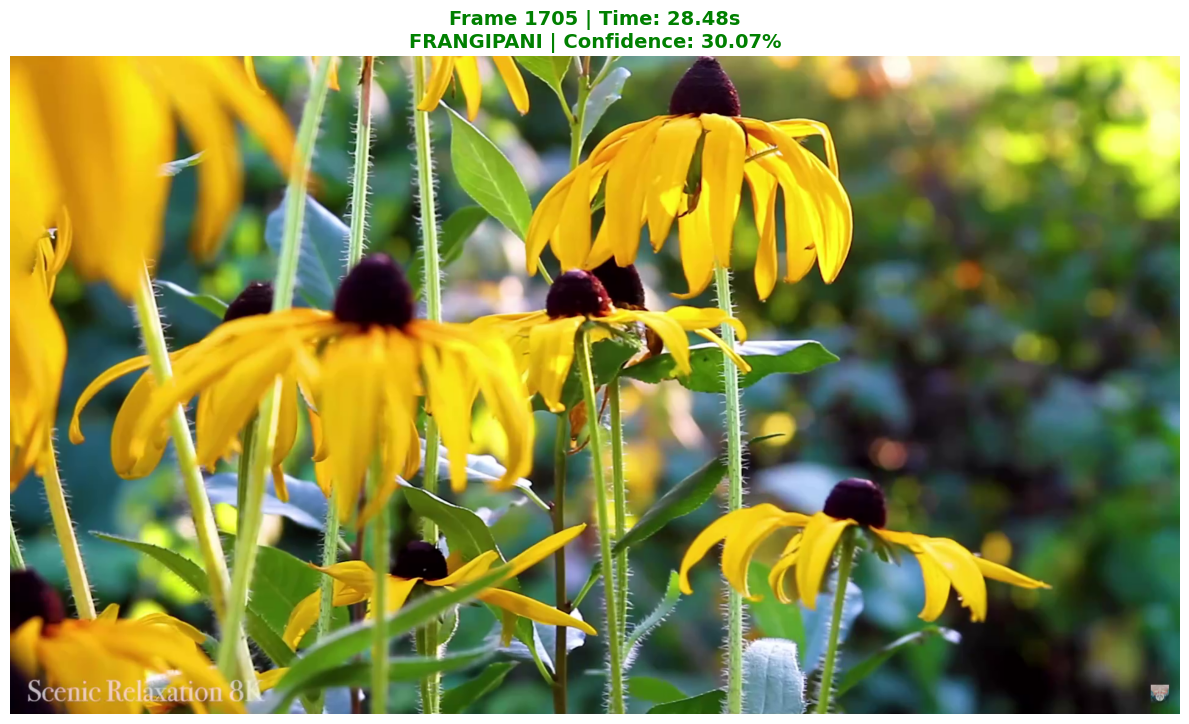


PLAYBACK COMPLETE - FINAL RESULTS
Total frames processed: 342
Processing time: 319.7s
Average FPS: 1.1

Unique flowers detected: 18
Average confidence: 41.28%
Max confidence: 99.82%
Min confidence: 7.01%

Flowers detected (sorted by frequency):
--------------------------------------------------------------------------------
 1. Class 100                      | Count:  81 ( 23.7%) | Avg Confidence: 34.50%
 2. camellia                       | Count:  65 ( 19.0%) | Avg Confidence: 56.31%
 3. mexican sunflower              | Count:  37 ( 10.8%) | Avg Confidence: 45.33%
 4. frangipani                     | Count:  28 (  8.2%) | Avg Confidence: 82.19%
 5. passion flower                 | Count:  28 (  8.2%) | Avg Confidence: 32.42%
 6. snapdragon                     | Count:  20 (  5.8%) | Avg Confidence: 18.76%
 7. river lily                     | Count:  17 (  5.0%) | Avg Confidence: 14.75%
 8. peruvian lily                  | Count:  12 (  3.5%) | Avg Confidence: 76.33%
 9. wild geranium

In [ ]:
# Correct Cell 13 : Execute Real Time Video Processing
video_path = video_manager.select_video('video_2')
if video_path:
    results = play_video_with_predictions(video_path, frame_interval=5, display_delay=0.0)